In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.   **Import anything**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증
import os

import warnings
warnings.filterwarnings('ignore')

In [9]:
csv_final='/content/drive/MyDrive/TEAM_ML/ML/DataSet/data_file_csv_final.csv'
dot_noneprunedtree='/content/drive/MyDrive/TEAM_ML/ML/Model/decisiontreeimg/dot_noneprunedtree.dot'
dot_prunedtree='/content/drive/MyDrive/TEAM_ML/ML/Model/decisiontreeimg/dot_prunedtree.dot'

In [4]:
data = pd.read_csv(csv_final, encoding='utf-8')
data.drop(columns=["Unnamed: 0"],inplace=True)
data.head()

,no,cartype,receipttime,settime,ridetime,startpos1,startpos2,endpos1,endpos2,receipt,...,startlat,startlon,endlat,endlon,startplus,endplus,gotowork,gotoschool,gotocharge,end_destination
0,8075,중형 승합,2022-05-07 오전 12:08:21,2022-05-07 오전 12:15:19,2022-05-07 오전 12:30:26,19,25,3,135,2022/05/07 0:08,...,37.53,126.90,37.49,126.90,7569,7469,0,0,0,0.0
1,8231,중형승합,2022-05-07 오전 12:08:51,2022-05-07 오전 12:17:25,2022-05-07 오전 12:46:23,20,203,9,83,2022/05/07 0:08,...,37.50,126.88,37.47,126.97,7568,7469,0,0,0,0.0
2,8279,중형 승합,2022-05-07 오전 12:09:00,2022-05-07 오전 12:26:57,2022-05-07 오전 12:54:43,15,271,15,124,2022/05/07 0:09,...,37.67,127.08,37.64,127.07,7670,7670,0,0,0,0.0
3,1560,중형 승합,2022-05-07 오전 12:13:00,2022-05-07 오전 12:14:01,2022-05-07 오전 12:14:25,11,78,4,238,2022/05/07 0:13,...,37.59,127.08,37.54,127.13,7570,7571,0,0,0,0.0
4,7913,중형승합,2022-05-07 오전 12:18:00,2022-05-07 오전 1:15:54,2022-05-07 오전 1:33:16,11,49,14,280,2022/05/07 0:18,...,37.61,127.09,37.57,127.06,7670,7570,0,0,0,0.0


In [5]:
data = pd.read_csv(csv_final, encoding='utf-8')
data = data[['end_destination', 'startplus',
                        'receipt-ride','hour',
                         'startpos1', 'startpos2', 'endplus']]
train, test = train_test_split(data, test_size=0.2, random_state=1)
train, val = train_test_split(train, test_size=0.25, random_state=1)
# feature Matrix, target vector 생성
target = 'endplus'
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# 확인
print("feature Matrix: ", X_train.shape, X_val.shape, X_test.shape)
print("target vector: ", y_train.shape, y_val.shape, y_test.shape)

feature Matrix:  (1242, 6) (415, 6) (415, 6)
target vector:  (1242,) (415,) (415,)


2.   **의사결정나무로 모델 구현**

In [6]:
classifier = DecisionTreeClassifier(random_state=10)
classifier = classifier.fit(X_train,y_train) #학습

In [12]:
if not os.path.exists('/content/drive/MyDrive/TEAM_ML/ML/Model/decisiontreeimg'):
    os.makedirs('/content/drive/MyDrive/TEAM_ML/ML/Model/decisiontreeimg')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.518662 to fit


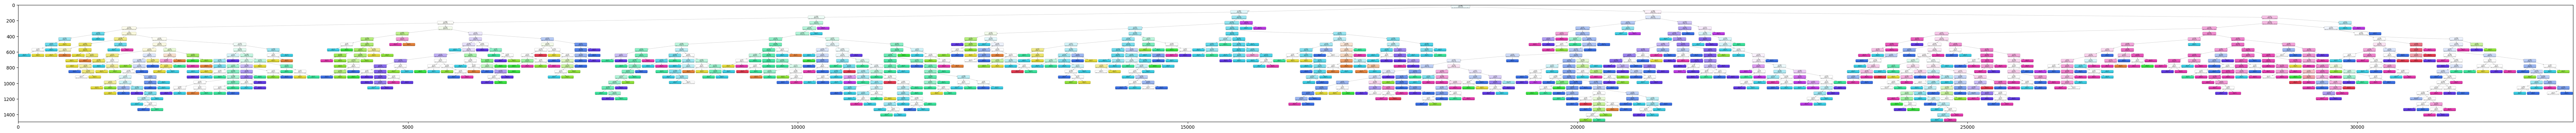

In [25]:
#여기서부터 의사결정나무를 그리는 코드
export_graphviz(classifier,   # 의사결정나무 모형 대입
                               out_file = dot_noneprunedtree,  # file로 변환할 것인가
                               #feature_names = all_data.feature_names,  # feature 이름
                               #class_names = all_data.target_names,  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

with open(dot_noneprunedtree) as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render(dot_noneprunedtree, view=True, format='png')
plt.figure(figsize=(100, 100))  # 여기에 plt.figure 함수 추가
plt.imshow(plt.imread(f'{dot_noneprunedtree}.png'))
plt.show()

In [26]:
y_pred = classifier.predict(X_test)
# 학습결과 평가
print("Train_Accuracy : ", classifier.score(X_train, y_train), '\n')
print("Test_Accuracy : ", classifier.score(X_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average = 'micro')
precision = mt.precision_score(y_test, y_pred, average = 'micro')
f1_score = mt.f1_score(y_test, y_pred, average = 'micro')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  0.9847020933977456 

Test_Accuracy :  0.5180722891566265 

Accuracy:  0.52 

Recall:  0.52 

Precision:  0.52 

F1_score:  0.52 

Confusion Matrix: 
 [[ 3  3  0  0  2  1  2  0  0  0  0]
 [ 1 11  1  1  4  4  1  2  0  0  0]
 [ 0  1  6  0  2  3  1  1  0  2  0]
 [ 0  0  2  3  1  1  1  2  0  1  0]
 [ 0  2  2  0 39  7  7  1  0  0  1]
 [ 2 10  1  1 12 56 10  5  1  4  1]
 [ 0  2  4  1  6 10 30 10  1 11  1]
 [ 0  0  0  0  0  2  7 17  1  4  0]
 [ 0  1  0  0  1  0  1  1 19  1  2]
 [ 0  0  2  0  4  7  8  1  0 28  1]
 [ 0  0  0  0  1  0  2  0  0  0  3]]


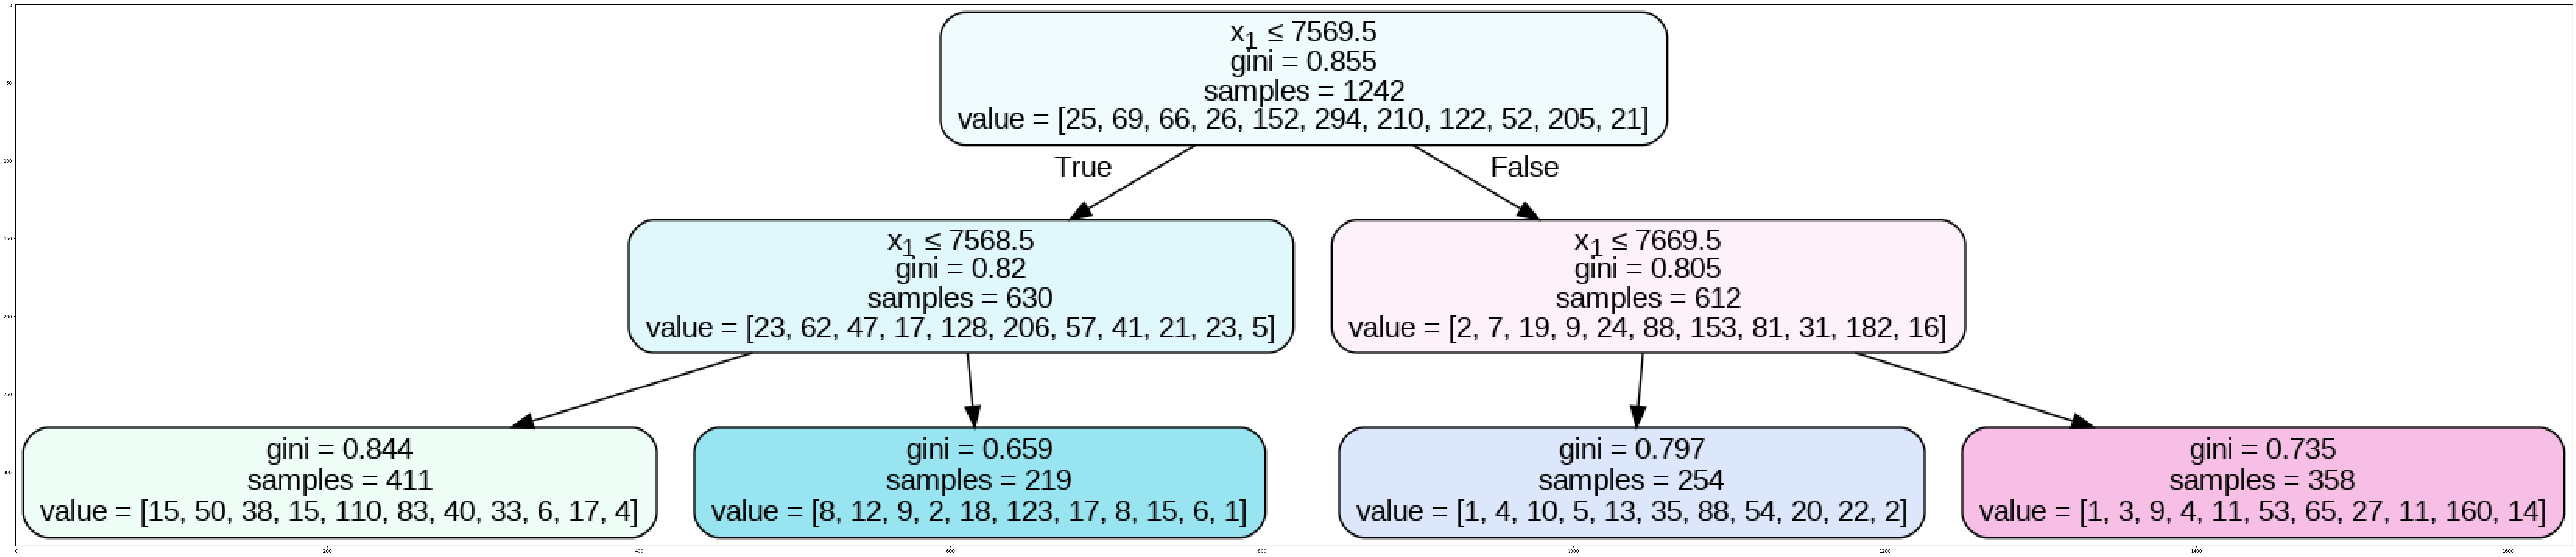

In [28]:
#가지치기가 적용된 의사결정나무 시각화
pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156)
pruned_dt_clf .fit(X_train, y_train)
export_graphviz(pruned_dt_clf,   # 의사결정나무 모형 대입
                               out_file = dot_prunedtree,  # file로 변환할 것인가
                               #feature_names = all_data.feature_names,  # feature 이름
                               #class_names = all_data.target_names,  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               impurity=True,
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

with open(dot_prunedtree) as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render(dot_prunedtree, view=True, format='png')
plt.figure(figsize=(100, 100))  # 여기에 plt.figure 함수 추가
plt.imshow(plt.imread(f'{dot_prunedtree}.png'))
plt.show()